# KNN e SVM
Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

## Leitura das bases

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Trabalhinhos/Trabalho Aula 04/titanic.csv")
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [14]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [15]:
#df_dummies = pd.get_dummies(df, columns=['Sex'], drop_first=True)
#df_dummies

In [16]:
df = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']].copy()
df

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=df.columns)
df_escalado.fillna(df_escalado.mean(), inplace=True)
df_escalado.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,0.273456,0.014151,0.0,0.125,0.0,1.0,1.0,0.0
1,0.473882,0.139136,1.0,0.125,0.0,0.0,0.0,1.0
2,0.323563,0.015469,1.0,0.000,0.0,1.0,1.0,1.0
3,0.436302,0.103644,1.0,0.125,0.0,0.0,1.0,1.0
4,0.436302,0.015713,0.0,0.000,0.0,1.0,1.0,0.0


In [18]:
alvo = '2urvived'
variaveis = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_escalado[variaveis], df_escalado[alvo] ,test_size=0.2)

X_train.head(3)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
117,0.361142,0.040989,0.0,0.125,0.0,0.5,1.0
236,0.549042,0.050749,0.0,0.125,0.0,0.5,1.0
150,0.636728,0.024447,0.0,0.000,0.0,0.5,1.0


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = knn.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.8452722063037249
acc_teste: 0.7824427480916031


In [20]:
for k in range(3, 20, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    preds = knn.predict(X_test)
    acc_teste = accuracy_score(y_test, preds)
    print(k, acc_train, acc_teste)

3 0.8452722063037249 0.7824427480916031
4 0.830945558739255 0.7862595419847328
5 0.8213944603629417 0.7862595419847328
6 0.8108882521489972 0.7862595419847328
7 0.8080229226361032 0.8053435114503816
8 0.7975167144221585 0.8091603053435115
9 0.7975167144221585 0.8206106870229007
10 0.7946513849092646 0.816793893129771
11 0.7956064947468959 0.816793893129771
12 0.7889207258834766 0.8129770992366412
13 0.7936962750716332 0.8053435114503816
14 0.7936962750716332 0.8129770992366412
15 0.7889207258834766 0.8091603053435115
16 0.7956064947468959 0.8129770992366412
17 0.7936962750716332 0.8091603053435115
18 0.7956064947468959 0.8091603053435115
19 0.7936962750716332 0.8091603053435115


In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = knn.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.8080229226361032
acc_teste: 0.8053435114503816


[[180  21]
 [ 30  31]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       201
         1.0       0.60      0.51      0.55        61

    accuracy                           0.81       262
   macro avg       0.73      0.70      0.71       262
weighted avg       0.80      0.81      0.80       262



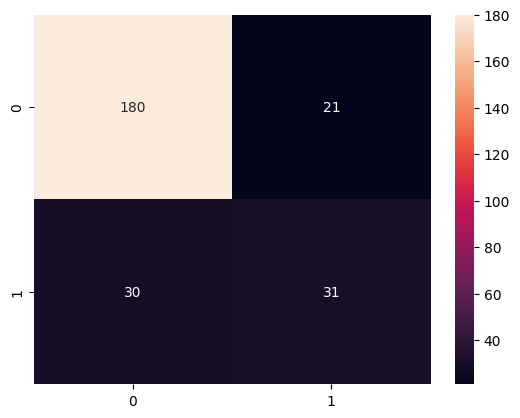

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

# SVM

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
acc_treino = svm.score(X_train, y_train)
print("acc_treino:", acc_treino)

preds = svm.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.7908309455587392
acc_teste: 0.8091603053435115


[[183  18]
 [ 32  29]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       201
         1.0       0.62      0.48      0.54        61

    accuracy                           0.81       262
   macro avg       0.73      0.69      0.71       262
weighted avg       0.80      0.81      0.80       262



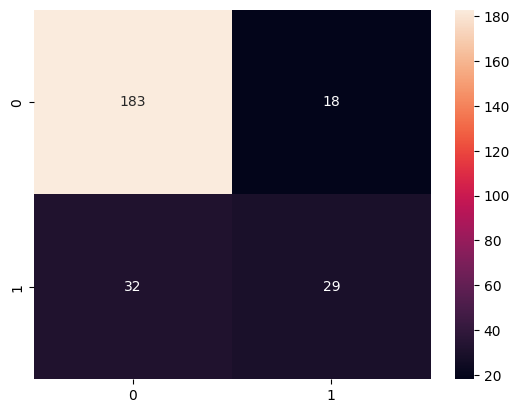

In [24]:
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

# Conclusão

- Ambos os modelos são melhores em prever quem morreu (Classe 0) do que quem sobreviveu (Classe 1).
- O KNN tem um recall um pouco melhor para os sobreviventes (51% vs 48%), mas uma precisão menor (60% vs 62%).
- O SVM tem um recall levemente melhor para os que morreram (91% vs 90%), indicando que ele classifica melhor essa classe.
- No geral, o desempenho dos dois está praticamente empatado.